In [1]:
maze_name = 'maze1'

In [2]:
maze = [[i for i in line.rstrip('\n')] for line in open(f'mazes_txt/{maze_name}.txt')]
maze

[['f', 'k', 'g', 'l'],
 ['b', 'g', 'j', 'j'],
 ['n', 'j', 'i', 'd'],
 ['o', 'h', 'o', 'h']]

In [3]:
row = len(maze)
column = len(maze[0])

In [4]:
import os

In [5]:
pwd = os.getcwd()

In [6]:
def createFolder(name):
    path = os.path.join(os.getcwd(), name)
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print ('Error: Creating directory. ' +  name)

In [7]:
createFolder('temp')

In [8]:
matrix = [[{'S':0, 'N':0, 'E':0, 'W':0} for j in range(column)] for i in range(row)]

In [9]:
matrix

[[{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}],
 [{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}],
 [{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}],
 [{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}]]

In [10]:
from PIL import Image

open_images = []
fin_img_col = []

In [11]:
koordinate = {}
susjed = [[0 for j in range(row*column)] for i in range(row*column)]
for i in range(1, 7):
    open_images.append(Image.open(f'maze_parts/{i}.png'))
width, height = open_images[0].size
blank_image = Image.new("RGB", (width*column, height*row))

for (i, x) in enumerate(maze):
    h = height * i
    for (j, y) in enumerate(x):
        w = width * j
        if y == 'a':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i+1,j), (i,j-1)]
            blank_image.paste(open_images[0], (w, h))
        elif y == 'b':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i+1,j)]
            blank_image.paste(open_images[1], (w, h))
        elif y == 'c':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j+1), (i+1,j), (i,j-1)]
            blank_image.paste(open_images[1].rotate(270), (w, h))
        elif y == 'd':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i+1,j), (i,j-1)]
            blank_image.paste(open_images[1].rotate(180), (w, h))
        elif y == 'e':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i,j-1)]
            blank_image.paste(open_images[1].rotate(90), (w, h))
        elif y == 'f':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i,j+1), (i+1,j)]
            blank_image.paste(open_images[2], (w, h))
        elif y == 'g':
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i+1,j), (i,j-1)]
            blank_image.paste(open_images[2].rotate(270), (w, h))
        elif y == 'h':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j-1)]
            blank_image.paste(open_images[2].rotate(180), (w, h))
        elif y == 'i':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1)]
            blank_image.paste(open_images[2].rotate(90), (w, h))
        elif y == 'j':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j), (i+1,j)]
            blank_image.paste(open_images[3], (w, h))
        elif y == 'k':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j+1), (i,j-1)]
            blank_image.paste(open_images[3].rotate(90), (w, h))
        elif y == 'l':
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i+1,j)]
            blank_image.paste(open_images[4], (w, h))
        elif y == 'm':
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j-1)]
            blank_image.paste(open_images[4].rotate(270), (w, h))
        elif y == 'n':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j)]
            blank_image.paste(open_images[4].rotate(180), (w, h))
        elif y == 'o':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            koordinate[(i,j)] = [(i,j+1)]
            blank_image.paste(open_images[4].rotate(90), (w, h))
        elif y == 'p':
            blank_image.paste(open_images[5], (w, h))

In [12]:
for i in range(6):
    open_images[i].close()

In [13]:
koordinate

{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 2), (0, 0)],
 (0, 2): [(1, 2), (0, 1)],
 (0, 3): [(1, 3)],
 (1, 0): [(0, 0), (1, 1), (2, 0)],
 (1, 1): [(2, 1), (1, 0)],
 (1, 2): [(0, 2), (2, 2)],
 (1, 3): [(0, 3), (2, 3)],
 (2, 0): [(1, 0)],
 (2, 1): [(1, 1), (3, 1)],
 (2, 2): [(1, 2), (2, 3)],
 (2, 3): [(1, 3), (3, 3), (2, 2)],
 (3, 0): [(3, 1)],
 (3, 1): [(2, 1), (3, 0)],
 (3, 2): [(3, 3)],
 (3, 3): [(2, 3), (3, 2)]}

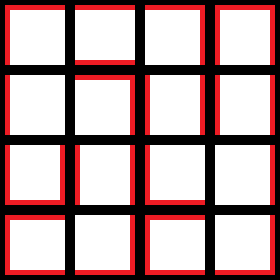

In [14]:
blank_image

In [15]:
blank_image.size

(280, 280)

In [16]:
import uuid

blank_image.save(f'temp/{str(uuid.uuid4())}_{maze_name}.jpg')

In [17]:
susjed

[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]